# Nikhil Andrew Franco
# 22BCE0654
# Predictive Analysis Project

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train_data= pd.read_csv(r"D:\Projects\instagram_pa\datasets\d2\train.csv");
test_data= pd.read_csv(r"D:\Projects\instagram_pa\datasets\d2\test.csv");
#df.head()

In [3]:
X2_train = train_data.drop(["fake"],axis=1).values
y2_train = train_data["fake"].values.reshape(-1,1)
X2_test  = test_data.drop(["fake"],axis=1).values
y2_test  = test_data["fake"].values.reshape(-1,1)


In [4]:
# Standardize the features
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)


In [5]:
# input_length= X2_train.shape[1]
# hidden_units=10
# Win= np.random.normal(size=[input_length,hidden_units])
# Win.shape
from hpelm import ELM
from sklearn.metrics import accuracy_score


Neurons: 50, Accuracy: 0.9000
Neurons: 51, Accuracy: 0.8917
Neurons: 52, Accuracy: 0.9083
Neurons: 53, Accuracy: 0.9083
Neurons: 54, Accuracy: 0.8917
Neurons: 55, Accuracy: 0.9083
Neurons: 56, Accuracy: 0.8667
Neurons: 57, Accuracy: 0.8750
Neurons: 58, Accuracy: 0.9000
Neurons: 59, Accuracy: 0.8667
Neurons: 60, Accuracy: 0.8917
Neurons: 61, Accuracy: 0.8833
Neurons: 62, Accuracy: 0.9000
Neurons: 63, Accuracy: 0.8667
Neurons: 64, Accuracy: 0.9000
Neurons: 65, Accuracy: 0.9167
Neurons: 66, Accuracy: 0.9083
Neurons: 67, Accuracy: 0.8750
Neurons: 68, Accuracy: 0.8583
Neurons: 69, Accuracy: 0.8667
Neurons: 70, Accuracy: 0.9000
Neurons: 71, Accuracy: 0.8667
Neurons: 72, Accuracy: 0.8917
Neurons: 73, Accuracy: 0.9250
Neurons: 74, Accuracy: 0.8917
Neurons: 75, Accuracy: 0.8917
Neurons: 76, Accuracy: 0.8667
Neurons: 77, Accuracy: 0.9000
Neurons: 78, Accuracy: 0.8583
Neurons: 79, Accuracy: 0.8917
Neurons: 80, Accuracy: 0.8750
Neurons: 81, Accuracy: 0.8833
Neurons: 82, Accuracy: 0.8667
Neurons: 8

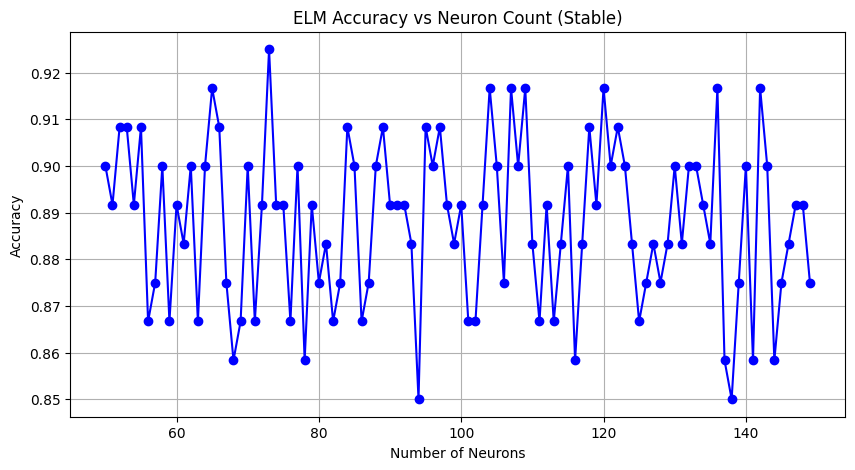

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

np.random.seed(42)  # Fix randomness for reproducibility

accuracy_store = []
neuron_range = range(50, 150)  # Test 50 to 149 neurons

for i in neuron_range:
    elm = ELM(X2_train.shape[1], 1, 'c')  # Reinitialize each time
    elm.add_neurons(i, "sigm")  
    elm.train(X2_train, y2_train)  
    y_pred = elm.predict(X2_test)
    y_pred = np.clip(y_pred, 0, 1) 
    y_pred = np.round(y_pred).flatten()  
    accuracy = accuracy_score(y2_test, y_pred)
    accuracy_store.append(accuracy)
    print(f"Neurons: {i}, Accuracy: {accuracy:.4f}")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(neuron_range, accuracy_store, 'b-', marker='o')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.title('ELM Accuracy vs Neuron Count (Stable)')
plt.grid(True)
plt.show()